# Energy Evaluation

### Define Energy Intesities

In [69]:
TRACE_RETENTION_DAYS = 30 # 30 days

# energy intensity kWh/GB
ENERGY_INTENSITY_NETWORK_KWH_PER_GB = 0.001875
ENERGY_INTENSITY_STORAGE_KWH_PER_GB_YEAR = 0.0046
ENERGY_INTENSITY_STORAGE_KWH_PER_GB = (ENERGY_INTENSITY_STORAGE_KWH_PER_GB_YEAR / 365) * TRACE_RETENTION_DAYS


In [70]:
%cd evaluation/

[Errno 2] No such file or directory: 'evaluation/'
/root/oxn/evaluation


## Load pre-processed data
This data can be pre-processed with the help of kepler-evaluation.ipynb (CPU+RAM), network-evaluation.ipynb and storage-evaluation.ipynb. If you want to do new experiments, you have to create these files yourself in the meantioned jupyter notebooks.

In [71]:
import pandas as pd
import tabulate as tabulate
network_data = pd.read_csv("cadvisor_network_bytes_received_all_absolute_bytes.csv", index_col=0)
network_data_transmitted = pd.read_csv("cadvisor_network_bytes_transmitted_all_absolute_bytes.csv", index_col=0)
storage_data = pd.read_csv("cadvisor_storage_usage_writes_all_absolute_bytes.csv", index_col=0)
kepler_data_joules = pd.read_csv("pods_kepler_joules_all_absolute_joules.csv", index_col=0)
kepler_dram = pd.read_csv("pods_kepler_dram_joules_all_joules.csv", index_col=0)


## Network
Further process the network data to transform total bytes received to kWh using the energy intensity

In [72]:
# get the last value for each label based on the time_normalized_rounded as this is the total amount of data received
network_data_processed = network_data.groupby("label").last().reset_index()


# remove the column time_normalized_rounded as it is not needed anymore
network_data_processed = network_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
network_data_processed.columns = network_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

network_data_processed = network_data_processed.set_index("label")

network_data_processed = network_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio"
])


# this values are in bytes, convert them to GB
network_data_processed = network_data_processed / (1000 * 1000 * 1000)


print("Total network data received per Experiment (label) in GB:")
print(network_data_processed.round(2).to_markdown())


# calculate the energy consumption in kWh
network_data_processed = network_data_processed * ENERGY_INTENSITY_NETWORK_KWH_PER_GB


# print as table
print("Total network data received per Experiment (label) and energy consumption in kWh:")
print(network_data_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in network_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {network_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {network_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")

Total network data received per Experiment (label) in GB:
| label                  |   accounting |     ad |   cart |   checkout |   currency |   elasticsearch |   email |   flagd |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   jaeger-collector |   jaeger-query |   kafka |   otel-collector |   payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |
|:-----------------------|-------------:|-------:|-------:|-----------:|-----------:|----------------:|--------:|--------:|------------------:|-----------:|-----------------:|----------:|-----------------:|-------------------:|---------------:|--------:|-----------------:|----------:|------------------:|-------------:|--------:|-----------------:|-----------:|--------------:|
| Baseline               |          nan | nan    | nan    |        nan |        nan |          nan    |     nan |  nan    |               nan |     nan    |           nan    |       na

/tmp/ipykernel_3819691/716743434.py:50: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_3819691/716743434.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (network_data_processed.loc[label].sum() / network_data_processed.loc["Baseline"].sum()) * 100


In [73]:
# get the last value for each label based on the time_normalized_rounded as this is the total amount of data received
network_data_transmitted_processed = network_data_transmitted.groupby("label").last().reset_index()


# remove the column time_normalized_rounded as it is not needed anymore
network_data_transmitted_processed = network_data_transmitted_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
network_data_transmitted_processed.columns = network_data_transmitted_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

network_data_transmitted_processed = network_data_transmitted_processed.set_index("label")

network_data_transmitted_processed = network_data_transmitted_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio"
])


# this values are in bytes, convert them to GB
network_data_transmitted_processed = network_data_transmitted_processed / (1000 * 1000 * 1000)


print("Total network data transmitted per Experiment (label) in GB:")
print(network_data_transmitted_processed.round(2).to_markdown())


# calculate the energy consumption in kWh
network_data_transmitted_processed = network_data_transmitted_processed * ENERGY_INTENSITY_NETWORK_KWH_PER_GB


# print as table
print("Total network data transmitted per Experiment (label) and energy consumption in kWh:")
print(network_data_transmitted_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in network_data_transmitted_processed.index:
    if label == "Baseline":
        print(f"{label}: {network_data_transmitted_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {network_data_transmitted_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")

Total network data transmitted per Experiment (label) in GB:
| label                  |   accounting |     ad |   cart |   checkout |   currency |   elasticsearch |   email |   flagd |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   jaeger-collector |   jaeger-query |   kafka |   otel-collector |   payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |
|:-----------------------|-------------:|-------:|-------:|-----------:|-----------:|----------------:|--------:|--------:|------------------:|-----------:|-----------------:|----------:|-----------------:|-------------------:|---------------:|--------:|-----------------:|----------:|------------------:|-------------:|--------:|-----------------:|-----------:|--------------:|
| Baseline               |       nan    | nan    | nan    |     nan    |     nan    |          nan    |  nan    |  nan    |            nan    |     nan    |           nan    |    na

/tmp/ipykernel_3819691/1786358496.py:50: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_3819691/1786358496.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (network_data_transmitted_processed.loc[label].sum() / network_data_transmitted_processed.loc["Baseline"].sum()) * 100


## Storage
Further process the storage data to transform total bytes used to kWh using the energy intensity

In [74]:
import pandas as pd
from pathlib import Path
import re

# ---------------------------------------------------------------------
# 1. Locate the raw CSVs
# ---------------------------------------------------------------------
DATA_DIR = Path("storage_snapshots")            # adapt if your files live elsewhere
csv_files = sorted(DATA_DIR.glob("recommendation_k8_*_storage_*.csv"))

# ---------------------------------------------------------------------
# 2. Map file‑names → human‑readable experiment label
#    (this reproduces the labels you used later in the notebook)
# ---------------------------------------------------------------------
def label_from_fname(fname: str) -> str:
    fname = fname.lower()
    if "50_percent_persistence"      in fname: return "50% Persistence"
    if "10_percent_persistence"      in fname: return "10% Persistence"
    if "5_percent_persistence"       in fname: return "5% Persistence"
    if "scrape_30s"                  in fname: return "Scrape 30s Persistence"
    if "scrape_5s"                   in fname: return "Scrape 5s Persistence"
    if "istio"                       in fname: return "Persistence Istio"
    # falls back to the “plain” persistence baseline
    return "Base Persistence"

# ---------------------------------------------------------------------
# 3. Read every CSV and aggregate Prometheus / Elasticsearch volumes
# ---------------------------------------------------------------------
records = []
for fp in csv_files:
    df = pd.read_csv(fp)
    rec = {
        "label":          label_from_fname(fp.name),
        "prometheus":     df[df["PVC"].str.contains("prometheus",     case=False)]["USAGE_BYTES"].sum(),
        "elasticsearch":  df[df["PVC"].str.contains("elasticsearch",  case=False)]["USAGE_BYTES"].sum(),
    }
    records.append(rec)

storage_data_pvc = pd.DataFrame.from_records(records)

# ---------------------------------------------------------------------
# 4. Bring labels & order in line with the code you posted
# ---------------------------------------------------------------------
storage_data_pvc["label"] = storage_data_pvc["label"].replace({
    "Base Persistence":           "Base Persistence",
    "Scrape 30s Persistence":     "Scrape 30s Persistence",
    "Scrape 5s Persistence":      "Scrape 5s Persistence",
    "5% Persistence":             "5% Persistence",
    "10% Persistence":            "10% Persistence",
    "50% Persistence":            "50% Persistence",
    "Persistence Istio":          "Persistence Istio",
})
storage_data_pvc = (storage_data_pvc
                .set_index("label")
                .reindex(["Base Persistence", "5% Persistence", "10% Persistence", "50% Persistence",
                          "Scrape 30s Persistence", "Scrape 5s Persistence", "Persistence Istio"]))

# ---------------------------------------------------------------------
# 5. Bytes → GB (decimal)  and print a quick GB table for sanity‑check
# ---------------------------------------------------------------------
storage_data_pvc_gb = storage_data_pvc / 1_000_000_000      # GB
print("Storage used per experiment [GB]:")
print((storage_data_pvc_gb).to_markdown())




Storage used per experiment [GB]:
| label                  |   prometheus |   elasticsearch |
|:-----------------------|-------------:|----------------:|
| Base Persistence       |    0.0632922 |        0.188272 |
| 5% Persistence         |    0.0718585 |        0.733511 |
| 10% Persistence        |    0.0757234 |        1.42293  |
| 50% Persistence        |    0.0633965 |        6.23135  |
| Scrape 30s Persistence |    0.124203  |        0.156449 |
| Scrape 5s Persistence  |    0.680235  |        0.190083 |
| Persistence Istio      |    0.0713955 |        0.248448 |


In [75]:
storage_data_processed = storage_data.groupby("label").last().reset_index()

# remove the column time_normalized_rounded as it is not needed anymore
storage_data_processed = storage_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
storage_data_processed.columns = storage_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

storage_data_processed = storage_data_processed.set_index("label")

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
storage_data_processed = storage_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])

# rename opentelemetry-collector to otel-collector
storage_data_processed = storage_data_processed.rename(index={"opentelemetry-collector": "otel-collector"})


# this values are in bytes, convert them to GB
storage_data_processed = storage_data_processed / (1000 * 1000 * 1000)

cols_to_replace = ["prometheus", "elasticsearch"]          # narrow the scope
storage_data_processed.loc[storage_data_pvc_gb.index, cols_to_replace] = (
    storage_data_pvc_gb[cols_to_replace]
)

print("Storage data used per Experiment (label) in GB:")
print(storage_data_processed.to_markdown())

# calculate the energy consumption in kWh
storage_data_processed = (storage_data_processed * ENERGY_INTENSITY_STORAGE_KWH_PER_GB)




# print as table
print("Total energy consumption for storage in kWh per Experiment (label):")
print(storage_data_processed.to_markdown())
print("Total energy consumption for storage in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in storage_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {storage_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {storage_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


Storage data used per Experiment (label) in GB:
| label                  |   accounting |           ad |   currency |   elasticsearch |   email |   flagd |   fraud-detection |   frontend |   frontend-proxy |       grafana |   image-provider |       kafka |   opensearch |   opentelemetry-collector |   payment |   prometheus |   quote |   recommendation |   valkey-cart |
|:-----------------------|-------------:|-------------:|-----------:|----------------:|--------:|--------:|------------------:|-----------:|-----------------:|--------------:|-----------------:|------------:|-------------:|--------------------------:|----------:|-------------:|--------:|-----------------:|--------------:|
| Baseline               |          nan | nan          |        nan |      nan        |     nan |     nan |      nan          |        nan |              nan | nan           |              nan | nan         |    nan       |                       nan |       nan |  nan         |     nan |              na

/tmp/ipykernel_3819691/3040142872.py:57: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_3819691/3040142872.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (storage_data_processed.loc[label].sum() / storage_data_processed.loc["Baseline"].sum()) * 100


Further process the CPU energy data. We use the average over the experiment as the kWh

In [76]:
""" kepler_data_processed = kepler_data.groupby("label").mean()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_data_processed = kepler_data_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_data_processed.columns = kepler_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_data_processed = kepler_data_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Base Persistence Istio"
])

# print as table
print("Total energy consumption in kWh per Experiment (label):")
print(kepler_data_processed.to_markdown())
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_data_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_data_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_data_processed.loc[label].sum() / kepler_data_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_data_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)") """

' kepler_data_processed = kepler_data.groupby("label").mean()\n\n# remove the column time_normalized_rounded as it is not needed anymore\nkepler_data_processed = kepler_data_processed.drop(columns=["time_normalized_rounded"])\n\n# remove _system-under-evaluation from the column names\nkepler_data_processed.columns = kepler_data_processed.columns.str.replace("_system-under-evaluation", "", regex=False)\n\n# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence\nkepler_data_processed = kepler_data_processed.reindex([\n    "Baseline",\n    "0%",\n    "5%",\n    "10%",\n    "50%",\n    "Scrape 5s Persistence",\n    "Base Persistence",\n    "5% Persistence",\n    "10% Persistence",\n    "50% Persistence",\n    "Base Persistence Istio"\n])\n\n# print as table\nprint("Total energy consumption in kWh per Experiment (label):")\nprint(kepler_data_processed.to_markdown())\nprint("Total energy consumption in kWh

In [77]:
kepler_data_joules_processed = kepler_data_joules.groupby("label").last()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_data_joules_processed = kepler_data_joules_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_data_joules_processed.columns = kepler_data_joules_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_data_joules_processed = kepler_data_joules_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Scrape 30s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])  

kepler_data_joules_processed_total = kepler_data_joules_processed.copy()
kepler_data_joules_processed_total["Total"] = kepler_data_joules_processed.sum(axis=1)

# print as table
print("Total energy consumption in Joules per Experiment (label):")
print(kepler_data_joules_processed_total.to_markdown())

# convert Joules to kWh
kepler_data_joules_processed = kepler_data_joules_processed / 3600000  # 1 kWh = 3.6 million Joules
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_data_joules_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_data_joules_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_data_joules_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


Total energy consumption in Joules per Experiment (label):
| label                  |   accounting |      ad |    cart |   checkout |   configfile |   currency |   elasticsearch |   email |   exporter |    flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   istio-init |   istio-proxy |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |   kafka |   master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |   worker |   Total |
|:-----------------------|-------------:|--------:|--------:|-----------:|-------------:|-----------:|----------------:|--------:|-----------:|---------:|-----------:|------------------:|-----------:|-----------------:|----------:|-----------------:|--------------:|-------------:|--------------:|-----------------------:|-----------------

/tmp/ipykernel_3819691/3269104230.py:40: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_3819691/3269104230.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (kepler_data_joules_processed.loc[label].sum() / kepler_data_joules_processed.loc["Baseline"].sum()) * 100


# DRAM
Does not work as expected currently. Values are strange and mostly negativ.


In [78]:
kepler_ram_joules_processed = kepler_dram.groupby("label").last()

# remove the column time_normalized_rounded as it is not needed anymore
kepler_ram_joules_processed = kepler_ram_joules_processed.drop(columns=["time_normalized_rounded"])

# remove _system-under-evaluation from the column names
kepler_ram_joules_processed.columns = kepler_ram_joules_processed.columns.str.replace("_system-under-evaluation", "", regex=False)

# sort the index for readability in this order: Baseline, 5%, 10%, 50%, Baseline Persistence, 5% Persistence, 10% Persistence, 50% Persistence
kepler_ram_joules_processed = kepler_ram_joules_processed.reindex([
    "Baseline",
    "0%",
    "5%",
    "10%",
    "50%",
    "Scrape 5s Persistence",
    "Base Persistence",
    "5% Persistence",
    "10% Persistence",
    "50% Persistence",
    "Persistence Istio",
])  

kepler_ram_joules_processed_total = kepler_ram_joules_processed.copy()
kepler_ram_joules_processed_total["Total"] = kepler_ram_joules_processed.sum(axis=1)

# print as table
print("DRAM energy consumption in Joules per Experiment (label):")
print(kepler_ram_joules_processed_total.to_markdown())

# convert Joules to kWh
kepler_ram_joules_processed = kepler_ram_joules_processed / 3600000  # 1 kWh = 3.6 million Joules
print("Total energy consumption in kWh per Experiment (label) and percentage difference from label 'Baseline':")

for label in kepler_ram_joules_processed.index:
    if label == "Baseline":
        print(f"{label}: {kepler_ram_joules_processed.loc[label].sum()} kWh (100%)")
    else:
        percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100
        print(f"{label}: {kepler_ram_joules_processed.loc[label].sum()} kWh ({percentage_difference:.2f}%)")


DRAM energy consumption in Joules per Experiment (label):
| label                 |   accounting |        ad |      cart |      checkout |   configfile |   currency |   elasticsearch |   email |      exporter |     flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   istio-init |   istio-proxy |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |     kafka |        master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |    worker |    Total |
|:----------------------|-------------:|----------:|----------:|--------------:|-------------:|-----------:|----------------:|--------:|--------------:|----------:|-----------:|------------------:|-----------:|-----------------:|----------:|-----------------:|--------------:|-------------:|--------------:|--------------

/tmp/ipykernel_3819691/3233025589.py:39: RuntimeWarning: invalid value encountered in scalar divide
  percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100
/tmp/ipykernel_3819691/3233025589.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_difference = (kepler_ram_joules_processed.loc[label].sum() / kepler_ram_joules_processed.loc["Baseline"].sum()) * 100


Categorize the energy consumption into "App", "Observability" and "System"

In [79]:
# | label            |   accounting |      ad |    cart |   checkout |   configfile |   copy-default-plugins |   currency |   elasticsearch |   elasticsearch-checker |   email |   flagd |   flagd-ui |   fraud-detection |   frontend |   frontend-proxy |   grafana |   image-provider |   init-config |   jaeger |   jaeger-agent-sidecar |   jaeger-collector |   jaeger-query |   kafka |   master |   opensearch |   opentelemetry-collector |   payment |   product-catalog |   prometheus-server |   quote |   recommendation |   shipping |   sysctl |   valkey-cart |   wait-for-kafka |   wait-for-valkey-cart |   worker |

kepler_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "cart": "Primary Services",
    "checkout": "Primary Services",
    "configfile": "Primary Services",
    "copy-default-plugins": "Primary Services",
    "currency": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "elasticsearch-checker": "Auxiliary Services",
    "email": "Primary Services",
    "exporter": "Auxiliary Services",
    "flagd": "Auxiliary Services",
    "flagd-ui": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "init-config": "Primary Services",
    "istio-init": "Auxiliary Services",
    "istio-proxy": "Auxiliary Services",
    "jaeger": "Auxiliary Services",
    "jaeger-agent-sidecar": "Auxiliary Services",
    "jaeger-collector": "Auxiliary Services",
    "jaeger-query": "Auxiliary Services",
    "kafka": "Primary Services",
    "master": "Primary Services",
    "opensearch": "Auxiliary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "payment": "Primary Services",
    "product-catalog": "Primary Services",
    "prometheus-server": "Auxiliary Services",
    "quote": "Primary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "sysctl": "Auxiliary Services",
    "valkey-cart": "Primary Services",
    "wait-for-kafka": "Primary Services",
    "wait-for-valkey-cart": "Primary Services",
    "worker": "Primary Services",
}

#| label            |   accounting |          ad |   elasticsearch |   email |   flagd |   fraud-detection |     frontend |   frontend-proxy |     grafana |   image-provider |       kafka |   opensearch |   payment |   prometheus |   recommendation |   shipping |   valkey-cart |

storage_data_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "currency": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "email": "Primary Services",
    "flagd": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "kafka": "Primary Services",
    "opensearch": "Auxiliary Services",
    "payment": "Primary Services",
    "prometheus": "Auxiliary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "valkey-cart": "Primary Services",
    "quote": "Primary Services",
    "product-catalog": "Primary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "checkout": "Primary Services",
    "cart": "Primary Services",
}

# | label            |   accounting |          ad |        cart |    checkout |    currency |   elasticsearch |   email |       flagd |   fraud-detection |   frontend |   frontend-proxy |     grafana |   image-provider |      jaeger |       kafka |   opensearch |   opentelemetry-collector |     payment |   product-catalog |   prometheus |   quote |   recommendation |   shipping |   valkey-cart |

network_data_mapping = {
    "accounting": "Primary Services",
    "ad": "Primary Services",
    "cart": "Primary Services",
    "checkout": "Primary Services",
    "currency": "Primary Services",
    "elasticsearch": "Auxiliary Services",
    "email": "Primary Services",
    "flagd": "Auxiliary Services",
    "fraud-detection": "Primary Services",
    "frontend": "Primary Services",
    "frontend-proxy": "Primary Services",
    "grafana": "Auxiliary Services",
    "image-provider": "Primary Services",
    "jaeger": "Auxiliary Services",
    "jaeger-collector": "Auxiliary Services", 
    "jaeger-query": "Auxiliary Services", 
    "otel-collector": "Auxiliary Services", 
    "kafka": "Primary Services",
    "opensearch": "Auxiliary Services",
    "opentelemetry-collector": "Auxiliary Services",
    "payment": "Primary Services",
    "product-catalog": "Primary Services",
    "prometheus": "Auxiliary Services",
    "quote": "Primary Services",
    "recommendation": "Primary Services",
    "shipping": "Primary Services",
    "valkey-cart": "Primary Services",
}

experiment_names = {
    'Scrape 5s Persistence': 'Monitoring High', 
    'Scrape 30s Persistence': 'Monitoring Medium', 
    'Base Persistence': 'Baseline',
    '5% Persistence': 'Tracing Low', 
    '10% Persistence': 'Tracing Medium', 
    '50% Persistence': 'Tracing High',
    'Persistence Istio' : 'Service Mesh'
}

relevant_columns = [ 'Scrape 30s Persistence', 'Scrape 5s Persistence','Base Persistence','5% Persistence', '10% Persistence', '50% Persistence', 'Persistence Istio']

from operator import ne
from pickle import NEWOBJ
import re
import pandas as pd

def categorize_energy_consumption(data: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    """
    Categorize and sum energy consumption based on component categories.

    Parameters:
    - data (pd.DataFrame): A DataFrame where rows represent measurements and columns represent component labels.
    - mapping (dict): A mapping from component label (column name) to a category (e.g., "Application", "Observability").

    Returns:
    - pd.DataFrame: A DataFrame with the same row indices as `data` and columns being the summed energy per category,
                    including an 'Uncategorized' column if needed.
    """
    # Initialize a DataFrame to store summed results
    categorized = pd.DataFrame(index=data.index)

    # Identify columns that are in the mapping
    mapped_cols = set(mapping.keys())
    data_cols = set(data.columns)
    unmapped_cols = list(data_cols - mapped_cols)

    # Print warning for unmapped columns
    if unmapped_cols:
        print(f"[WARNING] Uncategorized columns: {unmapped_cols}")

    # Iterate through unique categories
    for category in set(mapping.values()):
        cols = [col for col in data.columns if mapping.get(col) == category]
        categorized[category] = data[cols].sum(axis=1) if cols else 0

    # Add uncategorized columns
    if unmapped_cols:
        categorized["Uncategorized"] = data[unmapped_cols].sum(axis=1)
    
    return categorized


# Categorize the energy consumption for each dataset
network_categorized = categorize_energy_consumption(network_data_processed, network_data_mapping)
storage_categorized = categorize_energy_consumption(storage_data_processed, storage_data_mapping)
kepler_categorized = categorize_energy_consumption(kepler_data_joules_processed, kepler_mapping)

network_categorized = network_categorized.reindex(relevant_columns).rename(index=experiment_names)
storage_categorized = storage_categorized.reindex(relevant_columns).rename(index=experiment_names)
kepler_categorized = kepler_categorized.reindex(relevant_columns).rename(index=experiment_names)



In [80]:

# merge the categorized dataframes and sum on same column name
categorized_combined_raw = pd.concat([network_categorized, storage_categorized, kepler_categorized], axis=1)
categorized_combined = categorized_combined_raw.T.groupby(categorized_combined_raw.columns).sum().T


# add total summing up the categories for each experiment (label)
categorized_combined["Total"] = categorized_combined.sum(axis=1)


categorized_combined_transpose_wh = categorized_combined.T.copy() * 1000  # convert kWh to Wh


master = categorized_combined_transpose_wh.T.round(0)
master

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Medium,27.0,81.0,108.0
Monitoring High,30.0,79.0,110.0
Baseline,27.0,81.0,108.0
Tracing Low,31.0,81.0,112.0
Tracing Medium,36.0,80.0,117.0
Tracing High,75.0,76.0,151.0
Service Mesh,41.0,76.0,117.0


In [81]:
data = (kepler_categorized*1000)
data["Total"] = data.sum(axis=1)
data.round(0)

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Medium,11.0,73.0,84.0
Monitoring High,12.0,71.0,83.0
Baseline,11.0,73.0,83.0
Tracing Low,13.0,72.0,85.0
Tracing Medium,15.0,72.0,87.0
Tracing High,27.0,68.0,95.0
Service Mesh,26.0,67.0,93.0


In [82]:
1-data/master

,Auxiliary Services,Primary Services,Total
label,,,
Monitoring Medium,0.590415,0.101395,0.223650
Monitoring High,0.595183,0.103316,0.245613
Baseline,0.594095,0.104465,0.226872
Tracing Low,0.591439,0.105649,0.240109
Tracing Medium,0.592874,0.101496,0.260369
Tracing High,0.637882,0.109282,0.371831
Service Mesh,0.376379,0.117996,0.208541


In [83]:
kepler_categorized

,Auxiliary Services,Primary Services
label,,
Monitoring Medium,0.011059,0.072787
Monitoring High,0.012144,0.070838
Baseline,0.010959,0.072538
Tracing Low,0.012665,0.072442
Tracing Medium,0.014657,0.071880
Tracing High,0.027159,0.067695
Service Mesh,0.025568,0.067032


/tmp/ipykernel_3819691/3802221569.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


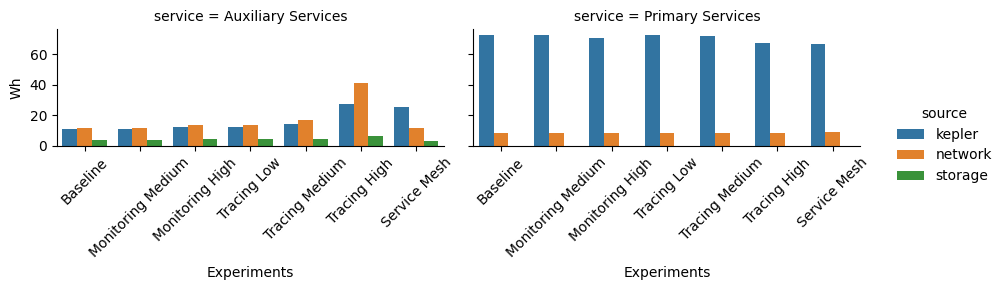

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import pandas as pd

def melt_df(df, source):
    # assume the experiment names are the index
    df = df.reset_index().melt(id_vars='label', var_name='service', value_name='value')
    df['source'] = source
    return df


df_k = melt_df(kepler_categorized*1000,  'kepler')
df_n = melt_df(network_categorized*1000, 'network')
df_s = melt_df(storage_categorized*1000, 'storage')

# 1. fresh, monotonically‑increasing index
df_all = pd.concat([df_k, df_n, df_s], ignore_index=True)

# 2. desired experiment sequence
experiment_order = [
    'Baseline',
    'Monitoring Medium',
    'Monitoring High',
    'Tracing Low',
    'Tracing Medium',
    'Tracing High',
    'Service Mesh'     
]

# 3. tell pandas/Seaborn the order is meaningful
df_all['label'] = pd.Categorical(df_all['label'],
                                 categories=experiment_order,
                                 ordered=True)


# 4. plot
g = sns.catplot(
    data=df_all,
    x='label', y='value',
    hue='source', col='service',
    kind='bar', ci=None,
    height=3, aspect=1.5
)

g.set_axis_labels("Experiments", "Wh")
g.set_xticklabels(rotation=45)

g.tight_layout()

plt.show()


/tmp/ipykernel_3819691/211700492.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=['service', 'label'],
/tmp/ipykernel_3819691/211700492.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['label'], rotation=45, fontweight='bold')
/tmp/ipykernel_3819691/211700492.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub['label'], rotation=45, fontweight='bold')


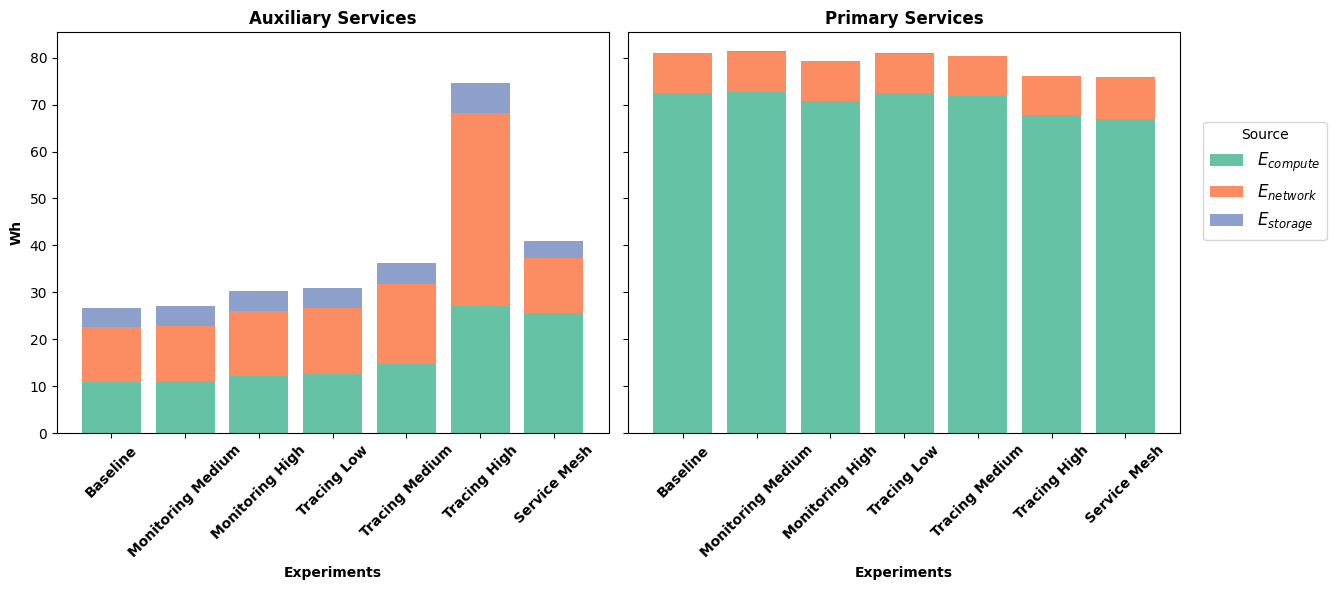

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np   # <- needed for cumulative bottoms

# ---------- (same data‑prep as you already have) ----------
def melt_df(df, source):
    df = df.reset_index().melt(id_vars='label',
                               var_name='service',
                               value_name='value')
    df['source'] = source
    return df

df_k = melt_df(kepler_categorized*1000,  '$E_{compute}$')
df_n = melt_df(network_categorized*1000, '$E_{network}$')
df_s = melt_df(storage_categorized*1000, '$E_{storage}$')

df_all = pd.concat([df_k, df_n, df_s], ignore_index=True)

experiment_order = [
    'Baseline', 'Monitoring Medium', 'Monitoring High',
    'Tracing Low', 'Tracing Medium', 'Tracing High', 'Service Mesh'
]
df_all['label'] = pd.Categorical(df_all['label'],
                                 categories=experiment_order,
                                 ordered=True)

# ---------- make one pivot table ----------
# rows: (service, experiment)  •  columns: source
pivot = (df_all
         .pivot_table(index=['service', 'label'],
                      columns='source',
                      values='value',
                      aggfunc='sum')
         .fillna(0)
         .reset_index())

sources   = df_all['source'].unique()                # ['kepler', 'network', 'storage']
colors    = sns.color_palette('Set2', n_colors=len(sources))
services  = pivot['service'].unique()
n_services = len(services)

fig, axes = plt.subplots(
    1, n_services, figsize=(6 * n_services, 6),
    sharey=True  # same % axis for every facet
)

if n_services == 1:             # handle the single‑facet case
    axes = [axes]

for ax, service in zip(axes, services):
    sub = pivot[pivot['service'] == service].copy()
    sub.sort_values('label', inplace=True)           # follow experiment_order

    bottoms = np.zeros(len(sub))
    for color, src in zip(colors, sources):
        ax.bar(sub['label'], sub[src], bottom=bottoms,
               color=color, label=src)
        bottoms += sub[src]

    ax.set_title(service, fontweight='bold')
    ax.set_xlabel("Experiments", fontweight='bold')
    ax.set_xticklabels(sub['label'], rotation=45, fontweight='bold')
    # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

axes[0].set_ylabel("Wh", fontweight='bold')
fig.legend(title="Source", bbox_to_anchor=(1.00, 0.69), loc="center left", 
           handles=axes[0].get_legend_handles_labels()[0],
           labels=axes[0].get_legend_handles_labels()[1], fontsize='large')
fig.tight_layout()
plt.show()

fig.savefig("plots/energy_consumption_per_experiment.pdf", bbox_inches='tight', dpi=300)